> ## **Lista 01 - Análise de Dados**

## ✨ **Exercício 1: Análise do Arquivo `claims.csv`**

### 🔍 **Contexto:**
>O arquivo **`claims.csv`** contém uma amostra aleatória de **996 apólices de seguros de veículos** referente ao período **2004-2005**.

### 🗂️ **Descrição das Variáveis:**

1. **`valorv`**: 💲 Valor do veículo em **10.000 dólares australianos**.
2. **`expos`**: 🕒 Exposição do veículo ao risco.
3. **`nsinistros`**: 🚗 Número de sinistros no período.
4. **`csinistros`**: 💰 Custo total dos sinistros em **dólares australianos**.
5. **`tipov`**: 🚙 Tipo do veículo (**11 categorias**).
6. **`idadev`**: 📅 Idade do veículo (**4 categorias**).
7. **`sexoc`**: 🚹 Sexo do condutor principal.
8. **`areac`**: 🌍 Área de residência do condutor principal.
9. **`idadec`**: 👨‍🦳 Idade do condutor principal (**6 categorias**).


### 🧮 **Cálculo da Variável Resposta:**
A variável resposta **`cmsinistros`** será calculada como:

```python
cmsinistros = csinistros / nsinistros


Importando bibliotecas

In [113]:
import pandas as pd # leitura dos arq. .CSV, manipulação e transformação de dados, análise descritiva, integração com outras bibliotecas p/ visualização de dados, filtragem e seleção
import numpy as np # realizar cálculos numéricos complexos, manipular arrays e matrizes, implementar algoritmos de análise de dados e modelos matemáticos.
import matplotlib.pyplot as plt # cria e personaliza gráficos (estilos de linhas, cores, rótulos, legendas e eixos)
import seaborn as sns # visualização estatística com menos código, além de aplicar estéticas e paletas de cores
from scipy import stats # algoritmos e ferramentas científicas, além de análise estatística (testes estatísticos - normalidade - e distribuições estatísticas; e implementação de métodos de otimização e interpolação)
import statsmodels.api as sm # implementação de modelos estatísticos, testes estatísticos e análise de dados.

Carregando os dados

In [57]:
# leitura o arquivo CSV no caminho direcionado
claims = pd.read_csv(r'C:\Users\steph\Downloads\claims.csv', delimiter=';') # delimiter - indica que os campos no arquivo CSV são separados por ponto e vírgula (;)
# exibe as primeiras 5 linhas do DF para breve visualização 
claims.head(5)

,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec
0,"1,66","0,4845995893",1,"669,50999928",SEDAN,3,M,B,6
1,"1,51","0,9938398357",1,"806,6099987",SEDAN,3,F,F,4
2,"0,76","0,5393566051",1,"401,80545139",HBACK,3,M,C,4
3,"1,89","0,6543463381",2,"1811,7099972",STNWG,3,M,F,2
4,"4,06","0,8514715948",1,"5434,4399872",STNWG,2,M,F,3


In [58]:
# verificando os tipos de dados de cada coluna
print(claims.dtypes)

valorv        object
expos         object
nsinistros     int64
csinistros    object
tipov         object
idadev         int64
sexoc         object
areac         object
idadec         int64
dtype: object


#### ⚠️ **Problemas Pós-Carregamento de Dados**

Após o carregamento do arquivo `claims.csv`, foram identificados os seguintes problemas nas colunas:

1. **`valorv` (object)**: 
   - Problema: Esta coluna deveria ser numérica, mas está vindo como string (texto).
   - **Solução**: Converter para `float64`.

2. **`expos` (object)**: 
   - Problema: Esta coluna deveria ser numérica, mas está vindo como string (texto).
   - **Solução**: Converter para `float64`.

3. **`csinistros` (object)**: 
   - Problema: Esta coluna deveria ser numérica, mas está vindo como string (texto).
   - **Solução**: Converter para `float64`.

4. **`tipov` (object)**: 
   - Problema: Esta coluna contém categorias ou texto.
   - **Solução**: Pode ser deixada como `object` ou convertida para `category`.

5. **`sexoc` (object)**: 
   - Problema: Esta coluna contém categorias ou texto.
   - **Solução**: Pode ser deixada como `object` ou convertida para `category`.

6. **`areac` (object)**: 
   - Problema: Esta coluna contém categorias ou texto.
   - **Solução**: Pode ser deixada como `object` ou convertida para `category`.


In [59]:
# faltam valores nas colunas usadas para o cálculo?
print(claims[['csinistros', 'nsinistros']].isnull().sum())

# claims[['csinistros', 'nsinistros']]: seleciona apenas as colunas csinistros e nsinistros do DF claims.
# .isnull(): retorna um DF do mesmo formato, mas com valores booleanos indicando se o valor é NaN (Not a Number) ou não.
# .sum(): soma os valores booleanos True (1) e False (0), portanto, o resultado mostra o número total de valores ausentes (NaN) para cada coluna.

csinistros    0
nsinistros    0
dtype: int64


##### ✅ **Tratamento de Valores Ausentes?**

Como ambas as colunas retornam **0**, elas **não necessitam de tratamento adicional** para valores ausentes.


In [60]:
# tem valores zero em nsinistros?
print(claims['nsinistros'].value_counts())

nsinistros
1    941
2     50
3      4
4      1
Name: count, dtype: int64


In [61]:
# Convertendo todos os valores para string, substituindo vírgulas por pontos e convertendo para numérico
claims['csinistros'] = claims['csinistros'].astype(str).str.replace(',', '.')
claims['csinistros'] = pd.to_numeric(claims['csinistros'], errors='coerce') # coerce para a conversão dos valores inválidos para NaN (Not a Number)

# Verificar quantos valores NaN existem após a conversão
nan_count = claims['csinistros'].isna().sum()
print(f"Número de valores NaN em csinistros: {nan_count}")


Número de valores NaN em csinistros: 0


In [62]:
# primeiros registros para entender o formato dos dados e identificar possíveis problemas na conversão
print(claims['csinistros'].head())

0     669.509999
1     806.609999
2     401.805451
3    1811.709997
4    5434.439987
Name: csinistros, dtype: float64


In [63]:
# tipo de dados após conversão
print(claims['csinistros'].dtype) # confirmar o tipo de dados após a conversão e verificar se há valores ausentes restantes

float64


### 📊 **Análise Descritiva dos Dados**

**a. Faça uma análise descritiva dos dados e procure agrupar em um número menor de categorias algumas variáveis categóricas. Considere como variável resposta (target) cmsinistros = csinistros/nsinistros.**: 


In [64]:
# calculando a variável cmsinistros como o custo médio dos sinistros
claims['cmsinistros'] = claims['csinistros'] / claims['nsinistros']
claims

,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec,cmsinistros
0,"1,66","0,4845995893",1,669.509999,SEDAN,3,M,B,6,669.509999
1,"1,51","0,9938398357",1,806.609999,SEDAN,3,F,F,4,806.609999
2,"0,76","0,5393566051",1,401.805451,HBACK,3,M,C,4,401.805451
3,"1,89","0,6543463381",2,1811.709997,STNWG,3,M,F,2,905.854999
4,"4,06","0,8514715948",1,5434.439987,STNWG,2,M,F,3,5434.439987
...,...,...,...,...,...,...,...,...,...,...
991,"2,02","0,8596851472",1,3723.636360,HDTOP,3,M,F,3,3723.636360
992,"1,15","0,2299794661",1,20657.129944,STNWG,4,M,E,2,20657.129944
993,"4,49","0,3750855578",1,558.900000,STNWG,1,M,C,5,558.900000
994,"0,92","0,7446954141",1,353.770000,HBACK,3,F,A,4,353.770000


In [65]:
# Estatísticas descritivas de cmsinistros, como média, mediana, desvio padrão etc
cmsinistros_estat = claims['cmsinistros'].describe()
cmsinistros_estat


count      996.000000
mean      1731.349425
std       2952.122267
min        200.000000
25%        353.770000
50%        643.585000
75%       1787.602498
max      26507.294983
Name: cmsinistros, dtype: float64

In [66]:
# Frequências das variáveis categóricas
categoricas = ['tipov', 'idadev', 'sexoc', 'areac', 'idadec']
contagem_categorica = {col: claims[col].value_counts() for col in categoricas}
contagem_categorica

{'tipov': tipov
 SEDAN    314
 HBACK    272
 STNWG    268
 UTE       58
 TRUCK     28
 HDTOP     23
 PANVN     11
 COUPE     11
 MIBUS      6
 MCARA      4
 BUS        1
 Name: count, dtype: int64,
 'idadev': idadev
 3    309
 2    264
 4    236
 1    187
 Name: count, dtype: int64,
 'sexoc': sexoc
 F    567
 M    429
 Name: count, dtype: int64,
 'areac': areac
 C    313
 A    233
 B    196
 D    108
 E     90
 F     56
 Name: count, dtype: int64,
 'idadec': idadec
 4    228
 3    225
 2    207
 5    139
 1    110
 6     87
 Name: count, dtype: int64}

In [67]:
# Agrupamento de categorias para variáveis com muitas categorias de baixa frequência
# Grupo de tipos de veículo com baixa frequência em 'OUTROS'
claims['tipov'] = claims['tipov'].replace(['HBACK', 'UTE', 'PANELVAN'], 'OUTROS')

# Grupo de idade de condutor em faixas
claims['idadec'] = claims['idadec'].replace({
    1: 'Jovem',     # 18-21 anos
    2: 'Jovem',     # 18-21 anos
    3: 'Adulto',    # 22-59 anos
    4: 'Adulto',    # 22-59 anos
    5: 'Idoso',     # 59+ anos
    6: 'Idoso'      # 59+ anos
})

# Grupo de idade do veículo
claims['idadev'] = claims['idadev'].replace({
    1: 'Novo',
    2: 'Intermediário',
    3: 'Velho'
})

grupo = claims.describe(include='all')

#Resultado

# Exibindo as contagens das variáveis categóricas com uma melhor formatação
print("\n==== Contagens - Variáveis Categóricas ====\n")
for col, counts in contagem_categorica.items():
    print(f"\nColuna: {col}")
    print(counts.reset_index().to_string(index=False))

# Exibindo a análise descritiva após o agrupamento
print("\n==== Análise Descritiva Pós-Agrupamento ====\n")
print(grupo[['tipov', 'idadec', 'idadev', 'nsinistros', 'cmsinistros']].to_string())

# Visualizar as primeiras linhas do DataFrame para verificar o agrupamento
print("\n==== Primeiras Linhas ====\n")
print(claims[['tipov', 'idadev', 'idadec']].head())


==== Contagens - Variáveis Categóricas ====


Coluna: tipov
tipov  count
SEDAN    314
HBACK    272
STNWG    268
  UTE     58
TRUCK     28
HDTOP     23
PANVN     11
COUPE     11
MIBUS      6
MCARA      4
  BUS      1

Coluna: idadev
 idadev  count
      3    309
      2    264
      4    236
      1    187

Coluna: sexoc
sexoc  count
    F    567
    M    429

Coluna: areac
areac  count
    C    313
    A    233
    B    196
    D    108
    E     90
    F     56

Coluna: idadec
 idadec  count
      4    228
      3    225
      2    207
      5    139
      1    110
      6     87

==== Análise Descritiva Pós-Agrupamento ====

         tipov  idadec idadev  nsinistros   cmsinistros
count      996     996    996  996.000000    996.000000
unique      10       3      4         NaN           NaN
top     OUTROS  Adulto  Velho         NaN           NaN
freq       330     453    309         NaN           NaN
mean       NaN     NaN    NaN    1.061245   1731.349425
std        NaN     NaN    Na

In [68]:
# Visualizar as primeiras linhas do DataFrame para verificar o agrupamento
print("\n==== Primeiras Linhas do DataFrame ====\n")
print(claims[['tipov', 'idadev', 'idadec']].head())


==== Primeiras Linhas do DataFrame ====

    tipov         idadev  idadec
0   SEDAN          Velho   Idoso
1   SEDAN          Velho  Adulto
2  OUTROS          Velho  Adulto
3   STNWG          Velho   Jovem
4   STNWG  Intermediário  Adulto


**b. Qual é a relação da variável cmsinistros com sexo? Algum sexo é maior em média? Você consegue defender seu argumento utilizando as tecnicas que estudou?**

In [69]:
# Análise de `cmsinistros` por Sexo
# Estatísticas descritivas por sexo
estatisticas_sexo = claims.groupby('sexoc')['cmsinistros'].describe()
print(estatisticas_sexo)

       count         mean          std    min     25%     50%          75%  \
sexoc                                                                        
F      567.0  1643.213070  2657.230732  200.0  353.77  630.48  1757.329998   
M      429.0  1847.837336  3301.362525  200.0  353.77  703.02  1800.519997   

                max  
sexoc                
F      26507.294983  
M      24718.179993  


### 📝 **Considerações**

- **Média**: A média de `cmsinistros` é **mais alta para condutores homens**, indicando que o custo médio dos sinistros é maior nesse grupo.

- **Desvio Padrão**: O desvio padrão também é **maior para homens**, sugerindo que os valores de custo dos sinistros são **mais dispersos**.

- **Valores Mínimo e Máximo**: O valor mínimo de `cmsinistros` é igual para ambos os gêneros, mas no valor máximo, prevalece o **gênero feminino**, indicando que existem **valores mais extremos para mulheres**.

- **Mediana (50%)**: A mediana também é voltada para os homens, o que demonstra que o valor central dos custos médios dos sinistros é **mais alto para eles**.

- **Quartis**:
  - **1º Quartil (25%)**: Os valores são iguais para ambos os gêneros.
  - **3º Quartil (75%)**: O terceiro quartil é **um pouco mais alto para o gênero masculino**, indicando que os maiores custos médios tendem a ser mais elevados entre os homens.


¨¨¨¨¨¨

#### 📊 **Boxplot**

##### 1. **Mediana**
A linha dentro de cada caixa representa a **mediana** dos dados, ou seja, o valor central.

##### 2. **Quartis**
As extremidades da caixa representam o **primeiro quartil (Q1)** e o **terceiro quartil (Q3)**. Isso mostra a dispersão dos **50% centrais dos dados**.

##### 3. **Outliers**
Os pontos fora das “**antenas**” (linhas que se estendem das caixas) são considerados **outliers**, ou valores atípicos, que estão significativamente distantes da maioria dos dados.

##### 4. **Antenas**
As linhas que se estendem das caixas (também chamadas de “**whiskers**”) geralmente indicam o **alcance dos dados**, excluindo os outliers.


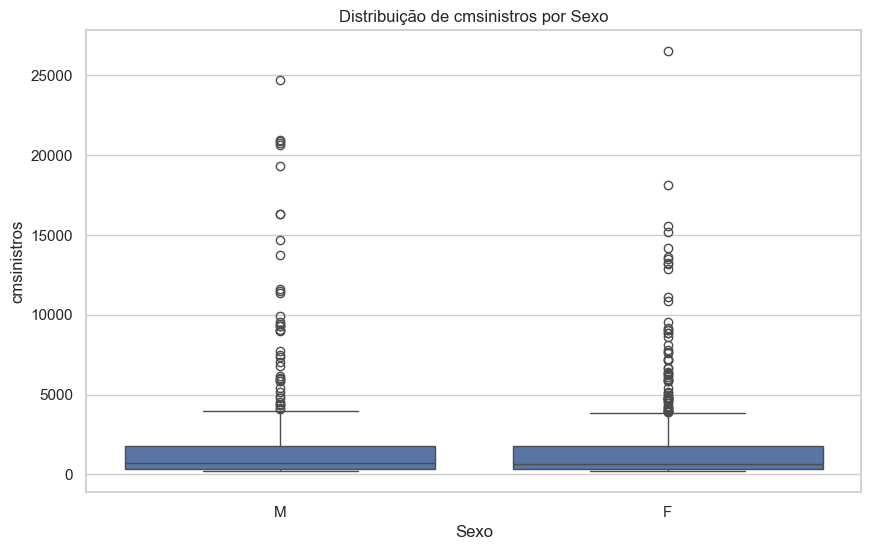

In [108]:
# Gráfico Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexoc', y='cmsinistros', data=claims)
plt.title('Distribuição de cmsinistros por Sexo')
plt.xlabel('Sexo')
plt.ylabel('cmsinistros')
plt.show()

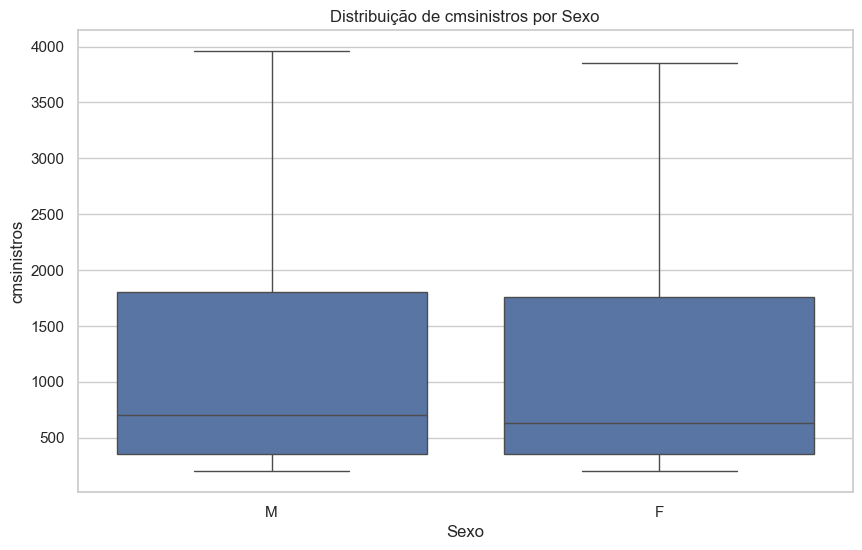

In [109]:
# Gráfico Boxplot sem outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexoc', y='cmsinistros', data=claims, showfliers=False)
plt.title('Distribuição de cmsinistros por Sexo')
plt.xlabel('Sexo')
plt.ylabel('cmsinistros')
plt.show()

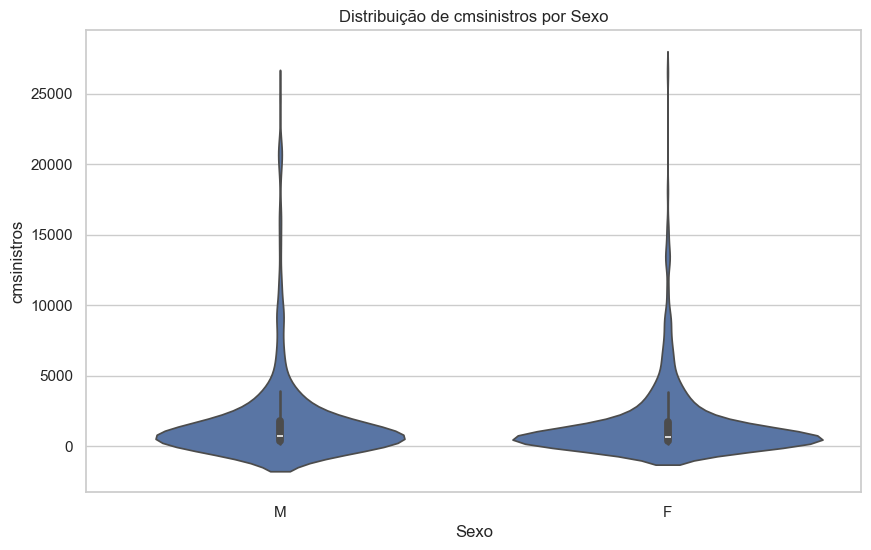

In [71]:
# Gráfico de Violin
plt.figure(figsize=(10, 6))
sns.violinplot(x='sexoc', y='cmsinistros', data=claims)
plt.title('Distribuição de cmsinistros por Sexo')
plt.xlabel('Sexo')
plt.ylabel('cmsinistros')
plt.show()

#### 🎻 **Interpretação do Violin Plot**

##### 1. **Distribuição dos Dados**
As formas dos violinos representam a **distribuição dos dados** para cada categoria (Masculino e Feminino). A largura do violino em qualquer ponto indica a **densidade dos dados** nesse valor específico. Partes mais largas indicam uma maior concentração de dados.

##### 2. **Mediana e Quartis**
No centro de cada violino, há uma linha branca que representa a **mediana** dos dados. As linhas finas que se estendem da mediana para cima e para baixo representam os **quartis** (Q1 e Q3).

##### 3. **Comparação entre Sexos**
A distribuição dos sinistros entre homens (M) e mulheres (F) é observada pela forma e largura dos violinos. Se um violino é mais largo em uma determinada faixa de valores, isso indica que mais dados estão concentrados nessa faixa para aquele sexo.


#### 📈 **Resultados**

**Homens (M):**
- A mediana dos sinistros está em torno de **703.02**.
- A distribuição é mais larga em valores mais baixos, indicando uma maior concentração de sinistros menores.
- Há uma presença de outliers, mas menos pronunciada que no boxplot.

**Mulheres (F):**
- A mediana dos sinistros está em torno de **630.48**.
- A distribuição é mais larga em valores mais baixos, semelhante aos homens, mas com uma concentração ligeiramente diferente.
- Também há outliers, mas a distribuição geral parece mais concentrada em valores mais baixos.


##### 🔍 **Comparação com `estatisticas_sexo`**
- **Mediana:** A linha branca no centro do violino corresponde à mediana mostrada na coluna **50%** de `estatisticas_sexo`.
- **Quartis:** As linhas finas que se estendem da mediana correspondem aos valores nas colunas **25%** e **75%**.
- **Dispersão:** A largura dos violinos em diferentes pontos mostra a variabilidade dos dados, que é quantificada pelo **desvio padrão (std)** em `estatisticas_sexo`.


In [111]:
# Teste estatístico para verificar a diferença nas médias de `cmsinistros` entre os sexos
# Teste t de Student para comparar as médias de `cmsinistros` entre os sexos
grupo_sexo = claims.groupby('sexoc')['cmsinistros']
# Obter os dados para cada sexo (ajuste os valores conforme suas categorias reais)
cmsinistros_masculino = grupo_sexo.get_group('M')
cmsinistros_feminino = grupo_sexo.get_group('F')
# Realizar o teste t de Student
t_stat, p_val = stats.ttest_ind(cmsinistros_masculino, cmsinistros_feminino, equal_var=False)

print(f'Estatística t: {t_stat}')
print(f'Valor-p: {p_val}')

Estatística t: 1.051658462374512
Valor-p: 0.2932721357839853
Estatística t: 1.051658462374512
Valor-p: 0.2932721357839853


In [73]:
# Interpretação do p-valor
if p_val < 0.05:
    print('A diferença nas médias de cmsinistros entre os sexos é significativa.')
else:
    print('Não há diferença significativa nas médias de cmsinistros entre os sexos.')
    
# como o p-valor é 0.2932721357839853, significa que a probabilidade de observar uma diferença grande entre as médias é cerca de 29%, ou seja, o valor é maior que o nível de significância comum (0.05), então não têm evidências estastiticamente signitificativas para rejeitar a HIPOTÉSE NULA.
# sobre a hipótese nula, mostra que não há diferença nas médias de 'cmsinistros' entre homens e mulheres.

Não há diferença significativa nas médias de cmsinistros entre os sexos.


 como o p-valor é 0.2932721357839853, significa que a probabilidade de observar uma diferença grande entre as médias é cerca de 29%, ou seja, o valor é maior que o nível de significância comum (0.05), então não têm evidências estastiticamente signitificativas para rejeitar a HIPOTÉSE NULA.
 
 sobre a hipótese nula, mostra que não há diferença nas médias de 'cmsinistros' entre homens e mulheres.

**c. Estude cmsinistros em relação a idade do condutor. Sua impressão muda se adicionarmos a variável sexo?**

In [74]:
# Primeiro, vamos observar a relação entre a idade do condutor e o custo médio dos sinistros (cmsinistros).
# Estatísticas descritivas de cmsinistros por faixa de idade do condutor
estatisticas_idade = claims.groupby('idadec')['cmsinistros'].describe()
print("\n==== Estatísticas Descritivas por Idade ====\n")
print(estatisticas_idade)


==== Estatísticas Descritivas por Idade ====

        count         mean          std    min     25%         50%  \
idadec                                                               
Adulto  453.0  1437.665736  2096.971664  200.0  353.77  654.939999   
Idoso   226.0  1776.769049  3146.615288  200.0  353.77  641.425000   
Jovem   317.0  2118.648720  3718.334914  200.0  353.77  646.000000   

                75%           max  
idadec                             
Adulto  1623.119999  16306.819977  
Idoso   1614.752498  20928.679932  
Jovem   2087.779999  26507.294983  


### 📊 **Interpretação dos Dados**

- **Count**: A maioria dos registros está na categoria de **adultos**, seguida por **jovens** e **idosos**.
- **Média**: O custo médio é **mais alto para jovens**, seguido por **idosos** e, por último, **adultos**.
- **Desvio Padrão**: Medindo a maior dispersão em torno da média, os **jovens** apresentam a maior variabilidade nos sinistros, seguidos por **idosos** e **adultos**, que têm a menor variação.
- **Valor Mínimo**: Todos os grupos têm o **mesmo valor mínimo**.
- **Valor Máximo**: Os **jovens** têm os maiores valores máximos, seguidos por **idosos** e **adultos**.
- **25%**: Há **igualdade** entre os grupos para o **25º percentil**.
- **50%**: Os **adultos** estão ligeiramente à frente, mas com pouca diferença em relação aos outros grupos.
- **75%**: **Adultos** e **idosos** têm custo abaixo do **75º percentil**.


### 📌 **Conclusão**

Os **condutores jovens** são os mais propensos a ter sinistros de **alto custo**, seguidos pelos **idosos**. Os **adultos** parecem ter sinistros de **menor custo médio** e **menor variabilidade**.


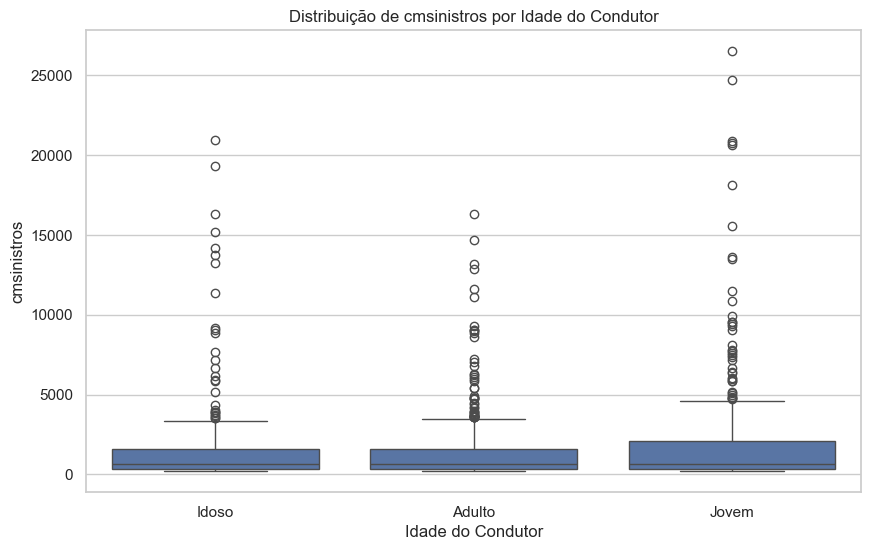

In [75]:
# Gráfico Boxplot de cmsinistros por faixa de idade, sem incluir o sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='idadec', y='cmsinistros', data=claims)
plt.title('Distribuição de cmsinistros por Idade do Condutor')
plt.xlabel('Idade do Condutor')
plt.ylabel('cmsinistros')
plt.show()

### 📊 **Interpretação do Boxplot**

1. **Mediana**: Os **jovens** têm a **mediana mais alta**, seguidos por **adultos** e, por fim, **idosos**.
  
2. **Quartis**: Os **jovens** apresentam a **maior dispersão** entre os quartis.

3. **Outliers**: Considerando que a "antena" que mais se estende indica a dispersão, os **jovens** têm **mais outliers**.

4. **Dispersão**: A extensão das **antenas** em relação à altura das caixas mostra que os **jovens** têm **maior variabilidade** nos dados.

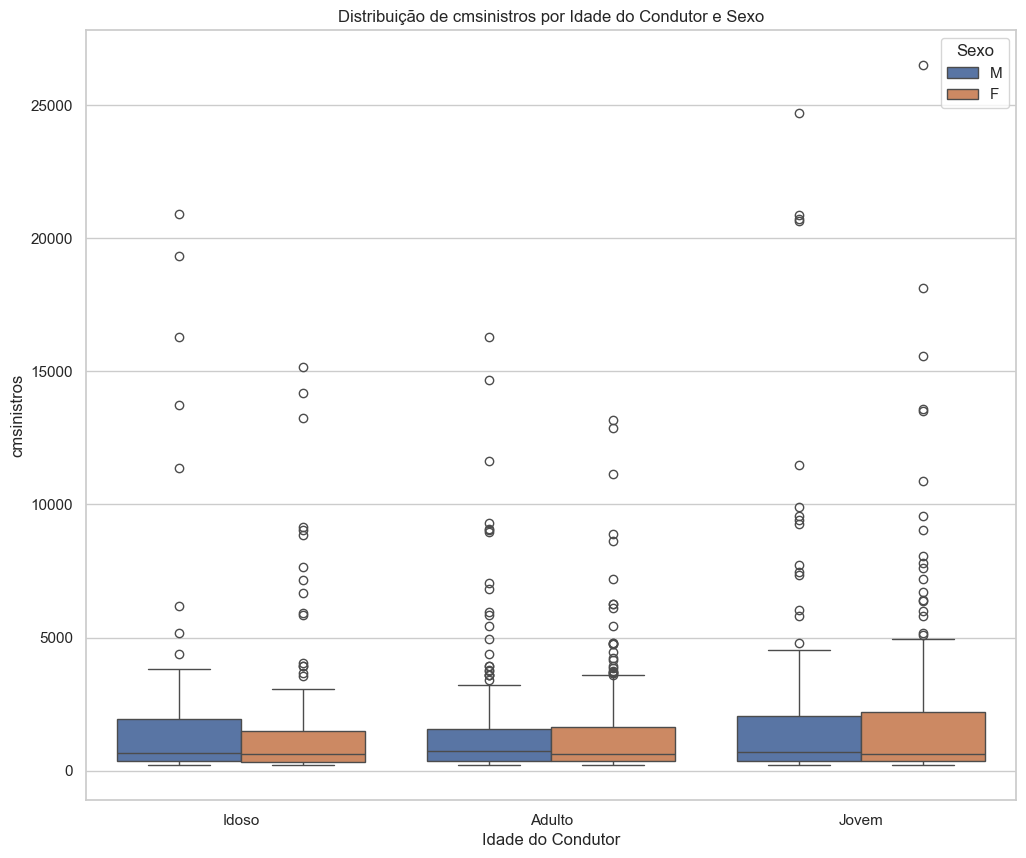

In [76]:
# Agora, incluindo o sexo na análise: Interação entre idade e sexo
plt.figure(figsize=(12, 10))
sns.boxplot(x='idadec', y='cmsinistros', hue='sexoc', data=claims)
plt.title('Distribuição de cmsinistros por Idade do Condutor e Sexo')
plt.xlabel('Idade do Condutor')
plt.ylabel('cmsinistros')
plt.legend(title='Sexo')
plt.show()

### 📊 **Interpretação do Boxplot**

1. **Mediana**: 
   - **Jovens homens** têm a **mediana mais alta**, com pouca diferença para **jovens mulheres**.
   - **Adultos** vêm em seguida, com homens um pouco acima das mulheres.
   - **Idosos** têm a **mediana mais baixa**, com mulheres um pouco acima dos homens.

2. **Quartis**: 
   - **Jovens homens** apresentam a **maior dispersão**, seguidos por **adultos homens** e, por último, **idosas mulheres**.

3. **Outliers**: 
   - Considerando a "antena" que mais se estende, os **jovens** têm **mais outliers**, especialmente os homens.

4. **Dispersão**: 
   - A extensão das **antenas** em relação à altura das caixas mostra que os **jovens homens** têm a **maior variabilidade** nos sinistros.


### 📌 **Conclusão**

Os **condutores jovens**, especialmente os **homens**, são os mais propensos a ter sinistros de **alto custo**. **Adultos** têm sinistros de **menor custo médio** e **menor variabilidade**. **Idosos** apresentam uma variabilidade intermediária, com mulheres mostrando uma **mediana** ligeiramente mais alta que os homens.


In [77]:
# Análise descritiva com combinação de idade e sexo
grupo_idade_sexo = claims.groupby(['idadec', 'sexoc'])['cmsinistros'].describe()
print("\n==== Estatísticas Descritivas por Idade e Sexo ====\n")
print(grupo_idade_sexo)


==== Estatísticas Descritivas por Idade e Sexo ====

              count         mean          std    min       25%         50%  \
idadec sexoc                                                                 
Adulto F      263.0  1354.664021  1876.764547  200.0  353.7700  632.429998   
       M      190.0  1552.557584  2368.696882  200.0  353.7700  720.404999   
Idoso  F      115.0  1710.401994  2826.287749  200.0  337.3500  620.209999   
       M      111.0  1845.527710  3459.000199  200.0  353.7700  669.509999   
Jovem  F      189.0  2003.856846  3354.900728  200.0  353.7700  623.450000   
       M      128.0  2288.146097  4206.149676  200.0  351.5775  707.399999   

                      75%           max  
idadec sexoc                             
Adulto F      1644.168748  13172.729980  
       M      1546.894999  16306.819977  
Idoso  F      1504.824999  15157.049957  
       M      1944.504999  20928.679932  
Jovem  F      2209.874997  26507.294983  
       M      2064.559999  

## 📌 **Conclusões**

1. **Homens** têm a **média mais alta** em relação aos sinistros e, além disso, apresentam **maior variabilidade**. As **mulheres** também têm média alta, mas **menor** se comparadas aos homens.

2. Quanto aos **idosos**, os **homens** têm a média de sinistros **mais alta**, além da **variabilidade**, mas em relação à **mediana**, as mulheres têm uma mediana **um pouco maior**.

**d. Existe uma relação clara de aumento de risco cmsinistros em relação ao valor do veículo?**

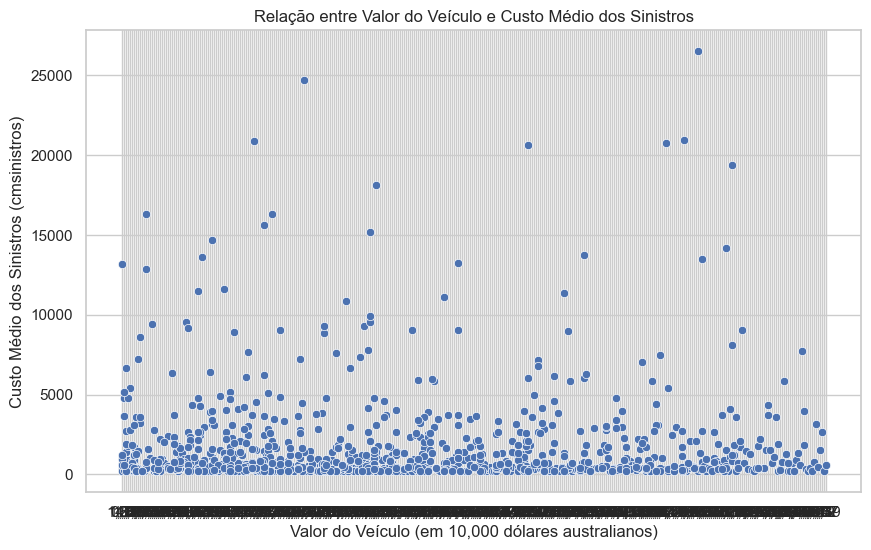

In [78]:
# Visualização da Relação entre `cmsinistros` e `valorv`
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valorv', y='cmsinistros', data=claims)
plt.title('Relação entre Valor do Veículo e Custo Médio dos Sinistros')
plt.xlabel('Valor do Veículo (em 10,000 dólares australianos)')
plt.ylabel('Custo Médio dos Sinistros (cmsinistros)')
plt.show()

In [112]:
# Correlação entre cmsinistros e valorv
print(claims[['valorv', 'cmsinistros']].corr())

               valorv  cmsinistros
valorv       1.000000    -0.040487
cmsinistros -0.040487     1.000000


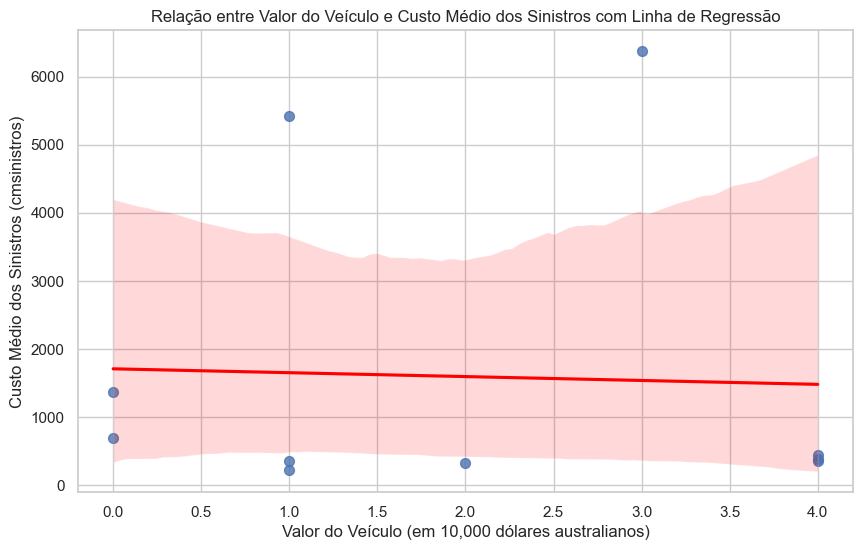

In [79]:
# Converter para float
claims['valorv'] = pd.to_numeric(claims['valorv'], errors='coerce')
claims['cmsinistros'] = pd.to_numeric(claims['cmsinistros'], errors='coerce')

# Gráfico de Dispersão com Linha de Regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='valorv', y='cmsinistros', data=claims, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Relação entre Valor do Veículo e Custo Médio dos Sinistros com Linha de Regressão')
plt.xlabel('Valor do Veículo (em 10,000 dólares australianos)')
plt.ylabel('Custo Médio dos Sinistros (cmsinistros)')
plt.show()

### 📈 **Interpretação do Gráfico de Dispersão**

- **Tendência Geral**: A linha vermelha indica que, à medida que o **valor do veículo** aumenta, o **número de sinistros** tende a diminuir, embora essa diminuição não seja muito acentuada.

- **Dispersão**: Existem pontos espalhados com **alta variabilidade** para diferentes valores de veículos, indicando **incerteza** na previsão. A ampla área vermelha (intervalo de confiança) sugere uma grande faixa de possíveis valores.

- **Correlação**: Parece haver uma **correlação ligeiramente negativa** entre o valor do veículo e o número de sinistros.

### 📌 **Conclusão**

Embora exista uma leve tendência de que veículos de **maior valor** tenham **menos sinistros**, a alta dispersão dos dados e a ampla faixa de confiança indicam que essa relação não é muito forte. Outros fatores, além do valor do veículo, provavelmente têm uma **influência significativa** no número de sinistros.


**e. A variável cmsinistros segue normalidade? Argumente com base no histograma, gráfico qq-plot e teste de normalidade.**

### 📊 **Possibilidades de Uso para Avaliação de Normalidade**

- **Histograma**: 
  - O histograma fornece uma **visualização da distribuição dos dados**. Se os dados seguem uma **distribuição normal**, o histograma deve ter uma forma aproximadamente de **sino**.

- **QQ-Plot**: 
  - O **QQ-plot** (quantile-quantile plot) compara os **quantis dos dados** com os **quantis de uma distribuição normal**. Para dados normais, os pontos no QQ-plot devem se alinhar aproximadamente ao longo de uma **linha reta**.

- **Teste de Normalidade**: 
  - Testes estatísticos podem avaliar se os dados seguem uma **distribuição normal**. Os testes comuns incluem:
    - **Teste de Shapiro-Wilk**: Avalia se os dados seguem uma distribuição normal.
    - **Teste de Kolmogorov-Smirnov**: Compara a distribuição dos dados com uma distribuição normal teórica.

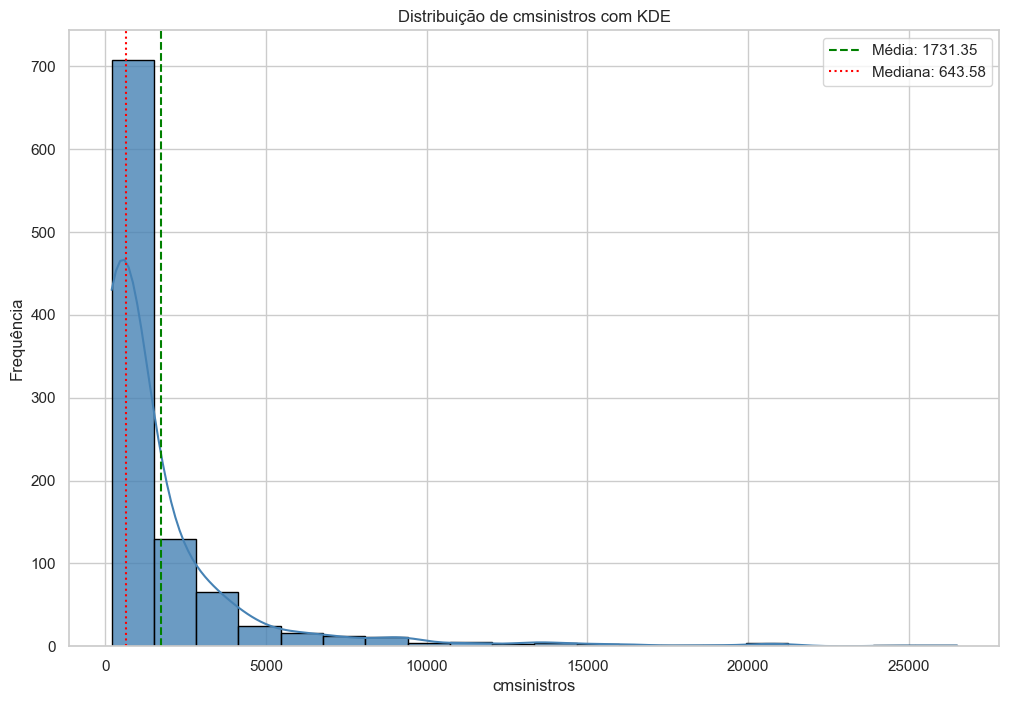

In [80]:
# Histograma
data = claims['cmsinistros'].dropna() # 'claims['cmsinistros'].dropna()' pelos dados reais
plt.figure(figsize=(12, 8))
sns.histplot(data, kde=True, bins=20, color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Distribuição de cmsinistros com KDE')
plt.xlabel('cmsinistros')
plt.ylabel('Frequência')
plt.axvline(data.mean(), color='green', linestyle='dashed', linewidth=1.5, label=f'Média: {data.mean():.2f}')
plt.axvline(data.median(), color='red', linestyle='dotted', linewidth=1.5, label=f'Mediana: {data.median():.2f}')
plt.legend()
plt.show()


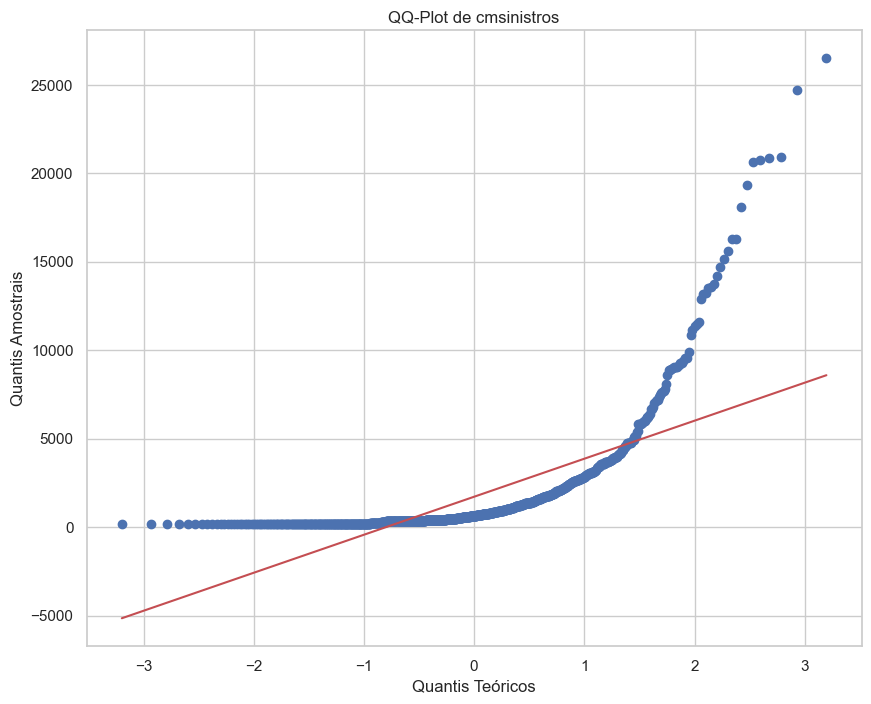

In [119]:
# QQ-Plot
plt.figure(figsize=(10, 8))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ-Plot de cmsinistros')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Amostrais')
plt.show()


### 📌 **Conclusão**

Embora a parte central da distribuição dos **sinistros** seja aproximadamente **normal**, é evidente a presença significativa de **outliers** nas caudas. Isso sugere que os sinistros de **alto custo** são mais frequentes do que se espera em uma distribuição normal.

In [117]:
# 3. Teste de Normalidade
# Teste Shapiro-Wilk
stat, p_value = stats.shapiro(data)
print(f"Teste Shapiro-Wilk: Estatística = {stat:.4f}, p-valor = {p_value:.4f}")

Teste Shapiro-Wilk: Estatística = 0.5290, p-valor = 0.0000


 p-valor é muito baixo (nível de significância comum é 0.05), então sugere que não seguem distribuição normal, então se rejeita a hipótese nula

In [83]:
# Teste Kolmogorov-Smirnov
stat, p_value_ks = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
print(f"Teste Kolmogorov-Smirnov: Estatística = {stat:.4f}, p-valor = {p_value_ks:.4f}")

Teste Kolmogorov-Smirnov: Estatística = 0.3020, p-valor = 0.0000


 assim como o Teste Shapiro-Wilk, o -valor é muito baixo (nível de significância comum é 0.05), então sugere que não seguem distribuição normal, então se rejeita a hipótese nula

## 📊 **Resultado Final**

A variável **'cmsinistros'** não segue **distribuição normal**. A análise com **histograma**, **QQ-Plot** e **testes de normalidade** indicou que é significativamente diferente de uma distribuição normal. 

- O histograma mostrou que a distribuição pode ser **assimétrica** (com suas caudas).
- O QQ-Plot apresentou **desvios significativos** esperados em uma distribuição normal.
- O **p-valor** obtido nos testes de normalidade é **muito baixo**.

_________

## ✨ **Exercício 2: Análise do Arquivo `canc3.csv`**

### 🔍 **Contexto:**
> O arquivo **`canc3.csv`** contém dados de um estudo de caso-controle realizado no Setor de Anatomia e Patologia do Hospital Heliópolis em São Paulo, no período de **1970 a 1982**. Um total de **175 pacientes** com processo infeccioso pulmonar atendido no hospital foi classificado segundo as seguintes variáveis:

### 🗂️ **Descrição das Variáveis:**

1. **`tipo`**: 🎗️ Tipo de tumor (**1: maligno, 0: benigno**).
2. **`IDADE`**: 📅 Idade em **anos**.
3. **`SEXO`**: 🚹 Sexo do paciente (**0: masculino, 1: feminino**).
4. **`HL`**: 🔬 Intensidade da célula histiócitos-linfócitos (**1: ausente, 2: discreta, 3: moderada, 4: intensa**).
5. **`FF`**: 🔍 Intensidade da célula fibrose-frouxa (**1: ausente, 2: discreta, 3: moderada, 4: intensa**).

### ❓ **Questões:**
a. Faça uma análise descritiva das variáveis do problema.

b. Existe alguma variável que chama atenção em relação ao tipo de tumor? (Dica: Cruze as variáveis em relação ao tipo de tumor).


### 🧮 **Análise Descritiva:**

In [84]:
import pandas as pd

# Carregar o dataset
canc3 = pd.read_csv(r'C:\Users\steph\Downloads\canc3.csv', delimiter=';') # delimiter - indica que os campos no arquivo CSV são separados por ponto e vírgula (;)

canc3.head(5)

,tipo,idade,sexo,hl,ff
0,0,26,1,3,1
1,0,21,1,3,1
2,0,45,1,3,3
3,0,19,2,4,3
4,0,16,2,4,3


In [85]:
# Verificar os tipos de dados das colunas
print(canc3.dtypes)

tipo     int64
idade    int64
sexo     int64
hl       int64
ff       int64
dtype: object


In [86]:
# Verificar os valores únicos em cada coluna
for col in canc3.columns:
    print(f"{col}: {canc3[col].unique()}")

tipo: [0 1]
idade: [26 21 45 19 16 72 53 33 39 41 27 46 65 32 22 23 42 82 55 43 49 20 28 34
 18 50 64 29 24 38 44 59 40 57 63 77 58 83 36 30 78 56 62 17 51 48 67 75
 87 31 76 60 73 15 61 52 69 70 66 74]
sexo: [1 2]
hl: [3 4 2 1]
ff: [1 3 2 4]


In [87]:
# Análise descritiva para variáveis numéricas
numerica = ['idade', 'hl', 'ff']
print(canc3[numerica].describe())

            idade          hl          ff
count  175.000000  175.000000  175.000000
mean    47.702857    2.605714    1.891429
std     18.206439    0.702190    0.893582
min     15.000000    1.000000    1.000000
25%     30.000000    2.000000    1.000000
50%     50.000000    3.000000    2.000000
75%     61.000000    3.000000    3.000000
max     87.000000    4.000000    4.000000


### 📊 **Variáveis Numéricas:**

#### **Idade 👤:**
- **Média**: 47,7 anos
- **Desvio padrão**: 18,2 anos
- **Idade mínima**: 15 anos
- **Idade máxima**: 87 anos
- **Quartis**:
  - **1º quartil**: 30 anos
  - **Mediana**: 50 anos
  - **3º quartil**: 61 anos


#### **HL (Intensidade da Célula Histiócitos-Linfócitos) 🔬:**
- **Média**: 2,6
- **Desvio padrão**: 0,7
- **Valor mínimo**: 1
- **Valor máximo**: 4
- **Quartis**:
  - **1º quartil**: 2
  - **Mediana**: 3
  - **3º quartil**: 3


#### **FF (Intensidade da Célula Fibrose-Frouxa) 🔍:**
- **Média**: 1,9
- **Desvio padrão**: 0,9
- **Valor mínimo**: 1
- **Valor máximo**: 4
- **Quartis**:
  - **1º quartil**: 1
  - **Mediana**: 2
  - **3º quartil**: 3


In [88]:
# Contagem de valores para cada variável categórica
tipo_count = canc3['tipo'].value_counts() # tumor benigno (0) ou maligno (1)
sexo_count = canc3['sexo'].value_counts() # F ou M
hl_count = canc3['hl'].value_counts() # intensidade de histiócitos-linfócitos
ff_count = canc3['ff'].value_counts() # intensidade de fibrose-frouxa

# Criar um DF para exibir os resultados
categorica = pd.DataFrame({
    'Tipo (0: benigno, 1: maligno)': tipo_count,
    'Sexo (1: M, 2: F)': sexo_count,
    'HL (intensidade de histiócitos-linfócitos)': hl_count,
    'FF (intensidade de fibrose-frouxa)': ff_count
})

# Exibir o DF
print(categorica)

   Tipo (0: benigno, 1: maligno)  Sexo (1: M, 2: F)  \
0                          104.0                NaN   
1                           71.0              126.0   
2                            NaN               49.0   
3                            NaN                NaN   
4                            NaN                NaN   

   HL (intensidade de histiócitos-linfócitos)  \
0                                         NaN   
1                                         8.0   
2                                        67.0   
3                                        86.0   
4                                        14.0   

   FF (intensidade de fibrose-frouxa)  
0                                 NaN  
1                                76.0  
2                                46.0  
3                                49.0  
4                                 4.0  


### 📊 **Variáveis Categóricas:**

#### **Tipo de Tumor (tipo) 🎗️:**
- **Tumor Benigno (0)**: 104 pacientes (59,4%)
- **Tumor Maligno (1)**: 71 pacientes (40,6%)


#### **Sexo 🚻:**
- **Feminino (1)**: 126 pacientes (72%)
- **Masculino (0)**: 49 pacientes (28%)

#### **Histiócitos-Linfócitos (hl) 🔬:**
- **Moderada (3)**: 86 pacientes (49,1%)
- **Discreta (2)**: 67 pacientes (38,3%)
- **Intensa (4)**: 14 pacientes (8%)
- **Ausente (1)**: 8 pacientes (4,6%)

#### **Fibrose-Frouxa (ff) 🔍:**
- **Ausente (1)**: 76 pacientes (43,4%)
- **Moderada (3)**: 49 pacientes (28%)
- **Discreta (2)**: 46 pacientes (26,3%)
- **Intensa (4)**: 4 pacientes (2,3%)

**2. Cruzamento de variáveis em relação ao tipo de tumor**

In [89]:
# Cruzando sexo com tipo de tumor
sexo_tumor = pd.crosstab(canc3['tipo'], canc3['sexo'], margins=True) # 'margins = true' é usada para ajustar a formatação das células de saída
print(sexo_tumor)

sexo    1   2  All
tipo              
0      78  26  104
1      48  23   71
All   126  49  175


 Há uma diferença na proporção de tumores malignos entre os sexos. A proporção de tumores malignos é ligeiramente maior entre as mulheres (47%) comparado aos homens (38%).

**Gráfico:**

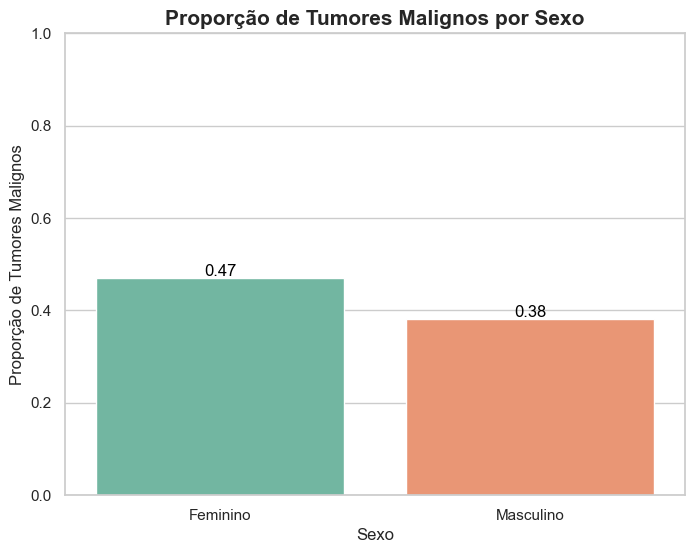

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir os dados para cruzamento de sexo e tipo de tumor
sexo_tumor = pd.crosstab(canc3['tipo'], canc3['sexo'], margins=True)
# Calcular as proporções de tumores malignos por sexo
prop_masculino_maligno = sexo_tumor.loc[1, 1] / sexo_tumor.loc['All', 1]
prop_feminino_maligno = sexo_tumor.loc[1, 2] / sexo_tumor.loc['All', 2]
# Dados para proporção de tumores malignos por sexo
proporcoes = pd.DataFrame({
    'Sexo': ['Feminino', 'Masculino'],
    'Proporção de Tumores Malignos': [prop_feminino_maligno, prop_masculino_maligno]
})

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sexo', y='Proporção de Tumores Malignos', data=proporcoes, hue='Sexo', palette='Set2', errorbar=None)

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Personalizar o gráfico
ax.set_title('Proporção de Tumores Malignos por Sexo', fontsize=15, fontweight='bold')
ax.set_ylabel('Proporção de Tumores Malignos')
ax.set_xlabel('Sexo')
plt.ylim(0, 1)
plt.show()


38% das mulheres têm tumores malignos e **47%** dos **homens** têm tumores malignos.

# Proporção de Tumores Malignos e Benignos por Sexo

         Masculino  Feminino  Total
Benigno         78        26    104
Maligno         48        23     71
Total          126        49    175


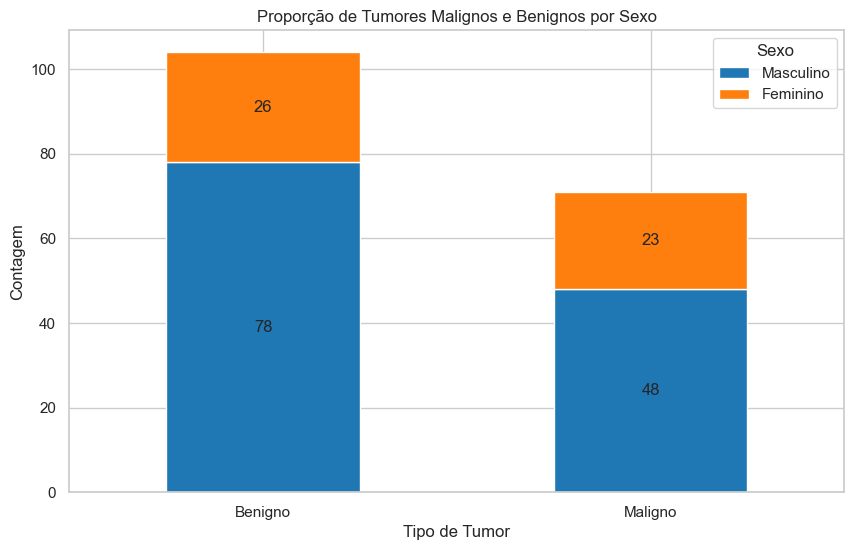

In [91]:
# Proporção de tumores malignos e benignos por sexo
sexo_tumor = pd.crosstab(canc3['tipo'], canc3['sexo'], margins=True, margins_name='Total') # renomear a coluna e a linha que contêm os totais das contagens

# Renomear as colunas para uma melhor compreensão
sexo_tumor.columns = ['Masculino', 'Feminino', 'Total']
sexo_tumor.index = ['Benigno', 'Maligno', 'Total']

# Exibir a tabela formatada
print("# Proporção de Tumores Malignos e Benignos por Sexo\n")
print(sexo_tumor)

# Criar um gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
sexo_tumor.drop('Total').drop(columns='Total').plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adicionar números nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

# Personalizar o gráfico
ax.set_xlabel('Tipo de Tumor')
ax.set_ylabel('Contagem')
ax.set_title('Proporção de Tumores Malignos e Benignos por Sexo')
ax.legend(title='Sexo')
plt.xticks(rotation=0)
plt.show()

In [92]:
# Cruzando hl com tipo de tumor
hl_tumor = pd.crosstab(canc3['tipo'], canc3['hl'], margins=True)
print(hl_tumor)

hl    1   2   3   4  All
tipo                    
0     2  24  65  13  104
1     6  43  21   1   71
All   8  67  86  14  175


### 🔍 **Interpretação dos Resultados:**

#### **Tumores Benignos 🎗️:**
- A maioria dos pacientes com tumores benignos apresenta uma intensidade de **FF** entre **2 e 3**, sendo que a intensidade de **FF = 3** é a mais comum.
- A intensidade de **FF** tende a ser mais alta, com a maioria dos casos apresentando **FF = 3**.


#### **Tumores Malignos 🎗️:**
- Para tumores malignos, a intensidade de **FF = 2** é a mais comum, enquanto a intensidade de **FF = 4** é rara.
- A intensidade de **FF** tende a ser menor, com uma predominância de **FF = 2** e uma baixa ocorrência de **FF = 4**.


**Gráficos**

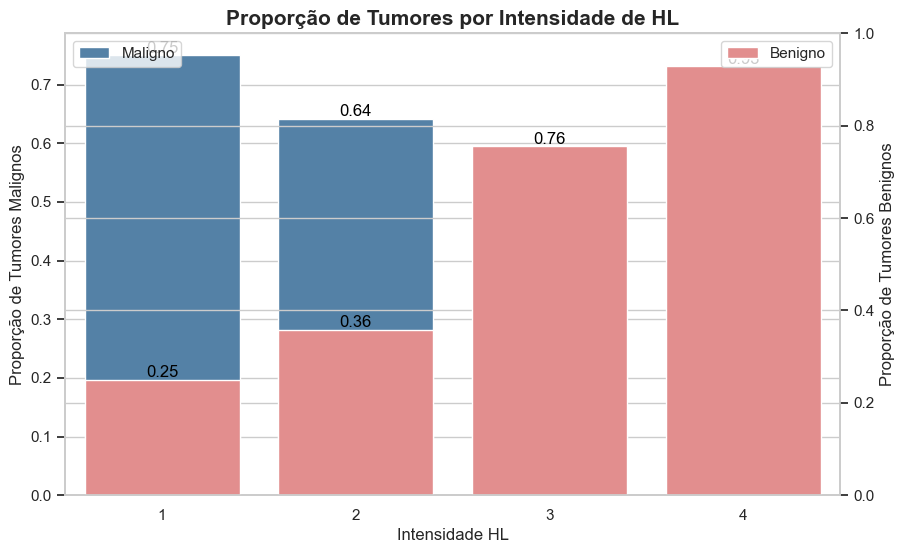

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar DataFrame para proporções
proporcoes_hl = pd.DataFrame({
    'Intensidade HL': hl_tumor.columns[:-1],  # Excluir a coluna 'All'
    'Proporção de Tumores Malignos': hl_tumor.loc[1, hl_tumor.columns[:-1]] / hl_tumor.loc['All', hl_tumor.columns[:-1]],
    'Proporção de Tumores Benignos': hl_tumor.loc[0, hl_tumor.columns[:-1]] / hl_tumor.loc['All', hl_tumor.columns[:-1]]
})

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para tumores malignos
sns.barplot(x='Intensidade HL', y='Proporção de Tumores Malignos', data=proporcoes_hl, color='steelblue', ax=ax, errorbar=None, label='Maligno')

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Criar o eixo secundário
ax2 = ax.twinx()

# Gráfico de barras para tumores benignos
sns.barplot(x='Intensidade HL', y='Proporção de Tumores Benignos', data=proporcoes_hl, color='lightcoral', ax=ax2, errorbar=None, label='Benigno')

# Adicionar os valores nas barras
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Personalizar o gráfico
ax.set_title('Proporção de Tumores por Intensidade de HL', fontsize=15, fontweight='bold')
ax.set_ylabel('Proporção de Tumores Malignos')
ax2.set_ylabel('Proporção de Tumores Benignos')
ax.set_xlabel('Intensidade HL')
plt.ylim(0, 1)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [94]:
# Cruzando ff com tipo de tumor
ff_tumor = pd.crosstab(canc3['tipo'], canc3['ff'], margins=True)
print(ff_tumor)


ff     1   2   3  4  All
tipo                    
0     31  32  39  2  104
1     45  14  10  2   71
All   76  46  49  4  175


### 🔍 **Interpretação dos Dados:**

#### **Intensidade FF e Tipo de Tumor 🎗️:**
- Tumores malignos são mais frequentes em intensidades de **FF** mais altas (principalmente **FF = 1**).
- Tumores benignos são mais frequentes em intensidades intermediárias (principalmente **FF = 3**).
- Há uma tendência de tumores malignos estarem mais associados a intensidades de fibrose frouxa mais altas, enquanto tumores benignos têm uma distribuição mais uniforme nas diferentes intensidades.


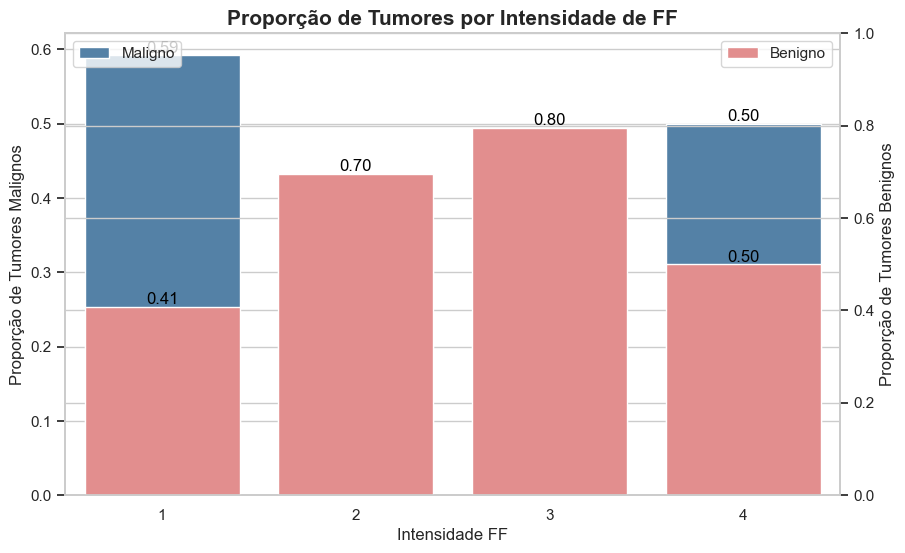

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar DataFrame para proporções
proporcoes_ff = pd.DataFrame({
    'Intensidade FF': ff_tumor.columns[:-1],  # Excluir a coluna 'All'
    'Proporção de Tumores Malignos': ff_tumor.loc[1, ff_tumor.columns[:-1]] / ff_tumor.loc['All', ff_tumor.columns[:-1]],
    'Proporção de Tumores Benignos': ff_tumor.loc[0, ff_tumor.columns[:-1]] / ff_tumor.loc['All', ff_tumor.columns[:-1]]
})

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para tumores malignos
sns.barplot(x='Intensidade FF', y='Proporção de Tumores Malignos', data=proporcoes_ff, color='steelblue', ax=ax, errorbar=None, label='Maligno')

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Criar o eixo secundário
ax2 = ax.twinx()

# Gráfico de barras para tumores benignos
sns.barplot(x='Intensidade FF', y='Proporção de Tumores Benignos', data=proporcoes_ff, color='lightcoral', ax=ax2, errorbar=None, label='Benigno')

# Adicionar os valores nas barras
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Personalizar o gráfico
ax.set_title('Proporção de Tumores por Intensidade de FF', fontsize=15, fontweight='bold')
ax.set_ylabel('Proporção de Tumores Malignos')
ax2.set_ylabel('Proporção de Tumores Benignos')
ax.set_xlabel('Intensidade FF')
plt.ylim(0, 1)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


### 📌 **Conclusões:**

#### **Sexo 🚻:**
- A proporção de tumores malignos é um pouco maior entre homens, mas a diferença não é estatisticamente significativa.


#### **Histiócitos-Linfócitos (HL) 🔬:**
- Tumores benignos são mais frequentemente associados a intensidades moderadas de **HL**, enquanto tumores malignos são mais comuns em intensidades discretas de **HL**.

#### **Fibrose-Frouxa (FF) 🔍:**
- Tumores malignos estão mais associados a intensidades baixas de **FF**, enquanto tumores benignos são mais variados em suas intensidades de **FF**.


**Distribuição da Idade por Tipo de Tumor**

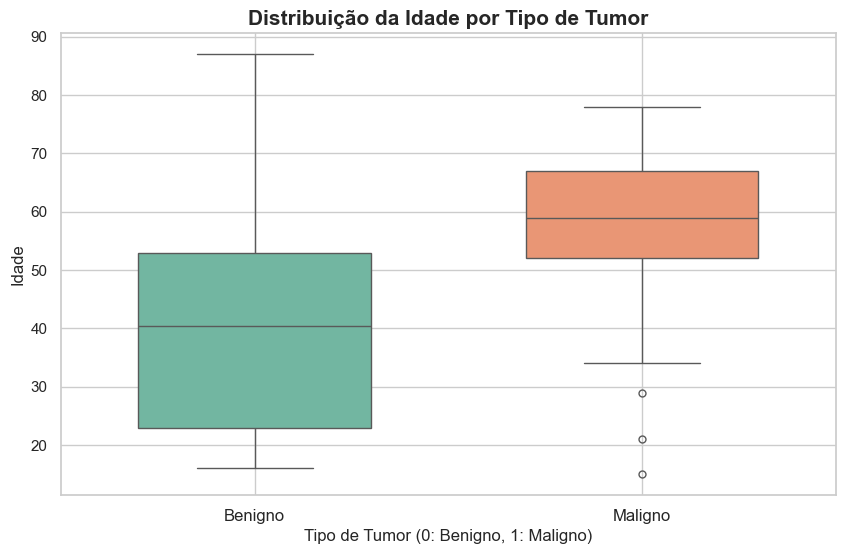

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o boxplot com personalizações
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='tipo', y='idade', hue='tipo', data=canc3, palette="Set2", width=0.6, fliersize=5, legend=False)

# Adicionar títulos e rótulos
ax.set_xlabel('Tipo de Tumor (0: Benigno, 1: Maligno)', fontsize=12)
ax.set_ylabel('Idade', fontsize=12)
ax.set_title('Distribuição da Idade por Tipo de Tumor', fontsize=15, fontweight='bold')

# Definir os ticks manualmente
ax.set_xticks([0, 1])
ax.set_xticklabels(['Benigno', 'Maligno'], fontsize=12)

# Adicionar gridlines
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Mostrar o gráfico
plt.show()


### 🔍 **Interpretações:**

#### **Tumores Benignos 🎗️:**
- A distribuição das idades é mais concentrada, com uma faixa interquartil menor.

#### **Tumores Malignos 🎗️:**
- A distribuição das idades é mais ampla, indicando uma maior variação nas idades dos pacientes.


# Proporção de Tumores Malignos e Benignos por Sexo

         Masculino  Feminino  Total
Benigno         78        26    104
Maligno         48        23     71
Total          126        49    175


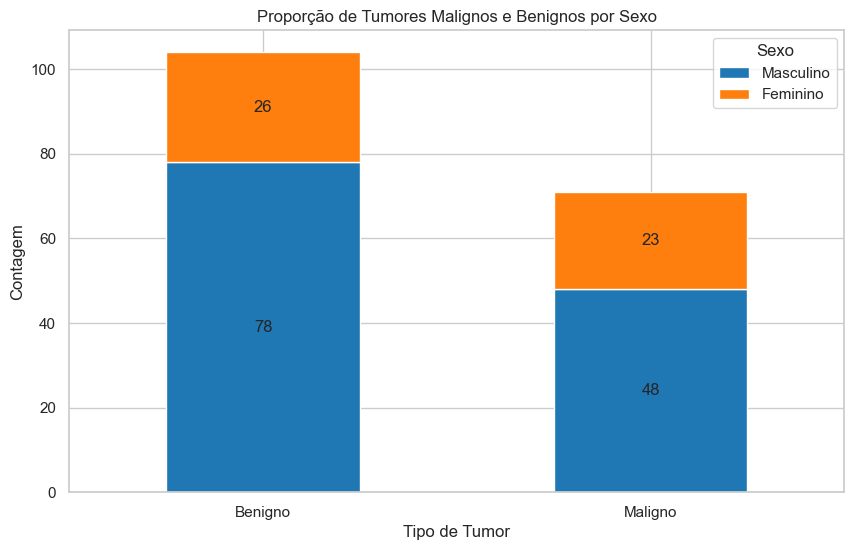

In [97]:
# Proporção de tumores malignos e benignos por sexo
sexo_tumor = pd.crosstab(canc3['tipo'], canc3['sexo'], margins=True, margins_name='Total') # renomear a coluna e a linha que contêm os totais das contagens

# Renomear as colunas para uma melhor compreensão
sexo_tumor.columns = ['Masculino', 'Feminino', 'Total']
sexo_tumor.index = ['Benigno', 'Maligno', 'Total']

# Exibir a tabela formatada
print("# Proporção de Tumores Malignos e Benignos por Sexo\n")
print(sexo_tumor)

# Criar um gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
sexo_tumor.drop('Total').drop(columns='Total').plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Adicionar números nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

# Personalizar o gráfico
ax.set_xlabel('Tipo de Tumor')
ax.set_ylabel('Contagem')
ax.set_title('Proporção de Tumores Malignos e Benignos por Sexo')
ax.legend(title='Sexo')
plt.xticks(rotation=0)
plt.show()

### 📊 **Teste de Significância Estatística:**

#### **Teste Qui-Quadrado 📈:**
- O teste Qui-Quadrado é utilizado para determinar se existe uma associação significativa entre duas variáveis categóricas.
- É especialmente útil para avaliar a relação entre o tipo de tumor e outras variáveis, como sexo e intensidades de HL e FF.
- Resultados significativos indicam que as distribuições observadas diferem das esperadas sob a hipótese nula de independência.


In [98]:
from scipy.stats import chi2_contingency

# Cruzamento entre tipo de tumor e sexo
cruz_sexo_tumor = pd.crosstab(canc3['tipo'], canc3['sexo'])

# Teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(cruz_sexo_tumor)

print(f"Valor qui-quadrado: {chi2}")
print(f"p-valor: {p}")
# Interpretação
if p < 0.05:
    print("Há uma associação significativa entre o tipo de tumor e o sexo.")
else:
    print("Não há uma associação significativa entre o tipo de tumor e o sexo.")

Valor qui-quadrado: 0.8069719062236673
p-valor: 0.3690170246503912
Não há uma associação significativa entre o tipo de tumor e o sexo.


### 📉 **Interpretação do Teste Qui-Quadrado:**

Neste conjunto de dados específico, o tipo de tumor não parece estar relacionado com o sexo dos pacientes de forma a produzir uma diferença significativa nas proporções de tumores malignos entre os sexos. 

- O p-valor (**0.369 > 0.05**) indica a probabilidade de observar um valor qui-quadrado tão extremo quanto o obtido, assumindo que não há associação entre o tipo de tumor e o sexo. 
- Portanto, não há diferença significativa entre homens e mulheres em relação ao tipo de tumor.


**Exploração adicional**

C:\Users\steph\AppData\Local\Temp\ipykernel_2908\3746354915.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Masculino', 'Feminino'], fontsize=12)
C:\Users\steph\AppData\Local\Temp\ipykernel_2908\3746354915.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


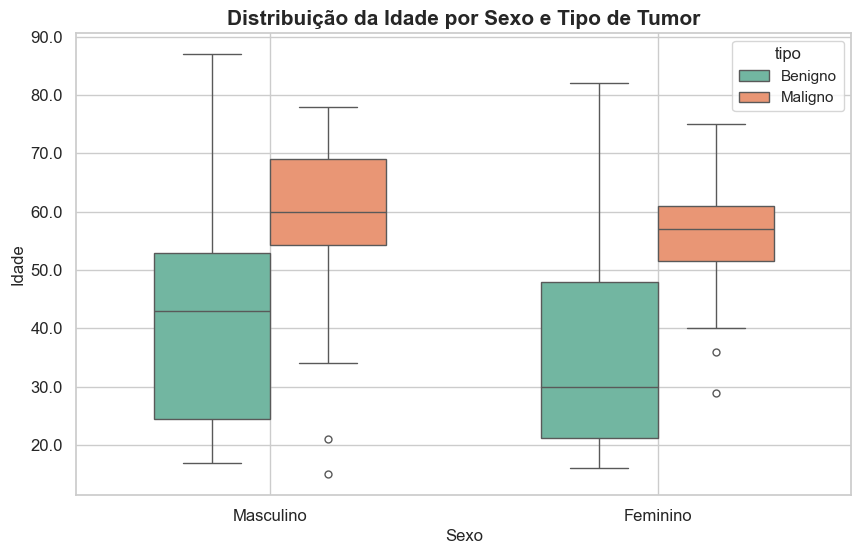

In [99]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Renomear os tipos de tumor no DataFrame
canc3['tipo'] = canc3['tipo'].map({0: 'Benigno', 1: 'Maligno'})

# Criar o boxplot com personalizações
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='sexo', y='idade', hue='tipo', data=canc3, palette="Set2", width=0.6, fliersize=5)

# Adicionar títulos e rótulos
ax.set_xlabel('Sexo')
ax.set_ylabel('Idade')
ax.set_title('Distribuição da Idade por Sexo e Tipo de Tumor', fontsize=15, fontweight='bold')

# Personalizar os rótulos dos eixos
ax.set_xticklabels(['Masculino', 'Feminino'], fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Adicionar gridlines
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Mostrar o gráfico
plt.show()

**A idade dos pacientes com tumores malignos tende a ser mais variada e geralmente maior do que a dos pacientes com tumores benignos, independentemente do sexo.**

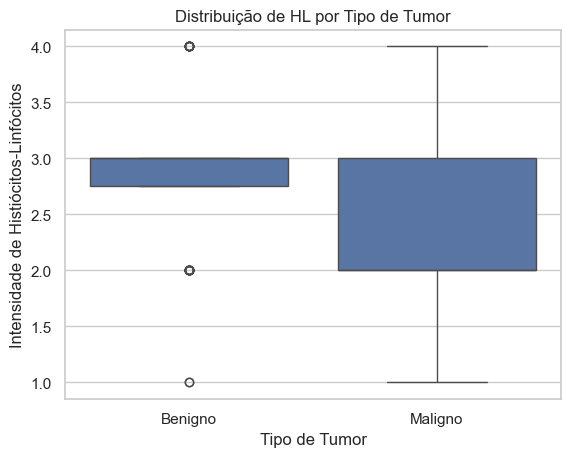

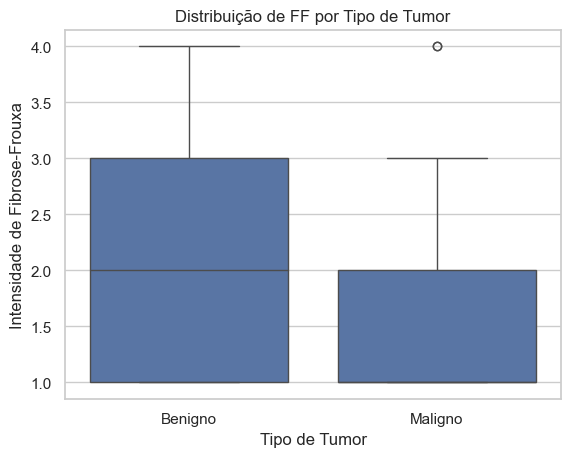

In [100]:
# Boxplot para a intensidade de Histiócitos-Linfócitos
sns.boxplot(x='tipo', y='hl', data=canc3)
plt.xlabel('Tipo de Tumor')
plt.ylabel('Intensidade de Histiócitos-Linfócitos')
plt.title('Distribuição de HL por Tipo de Tumor')
plt.show()

# Boxplot para a intensidade de Fibrose-Frouxa
sns.boxplot(x='tipo', y='ff', data=canc3)
plt.xlabel('Tipo de Tumor')
plt.ylabel('Intensidade de Fibrose-Frouxa')
plt.title('Distribuição de FF por Tipo de Tumor')
plt.show()


### 🔍 **Interpretações:**

#### **Tumores Benignos 🎗️:**
- A barra para tumores benignos atinge um pouco acima de **3.0** na escala de intensidade de fibrose frouxa.

#### **Tumores Malignos 🎗️:**
- A barra para tumores malignos atinge um pouco acima de **1.0** na escala de intensidade de fibrose frouxa.
- Há um ponto fora da área principal do gráfico, indicando um outlier com intensidade de fibrose frouxa próxima de **4.0**.

### 📌 **Conclusões:**
- A intensidade de fibrose frouxa é significativamente maior em tumores benignos em comparação com tumores malignos.


### 📝 **Considerações Finais:**

A análise descritiva das variáveis revela que a idade dos pacientes com processos infecciosos pulmonares variou amplamente, com uma tendência a maior idade associada a tumores malignos. A intensidade da célula **histiócitos-linfócitos (HL)** e da célula **fibrose-frouxa (FF)** mostrou diferenças notáveis entre tumores benignos e malignos.

A análise cruzada do tipo de tumor com o sexo dos pacientes não revelou uma diferença significativa nas proporções de tumores malignos entre homens e mulheres (**p-valor = 0,369**). Portanto, o tipo de tumor não parece estar associado de forma significativa ao sexo dos pacientes neste conjunto de dados.

Além disso, a intensidade da **fibrose frouxa** foi significativamente maior em tumores benignos comparados aos tumores malignos, indicando uma possível característica diferenciadora para a classificação dos tumores.

Esses resultados fornecem insights valiosos sobre as características dos tumores e podem auxiliar na compreensão das variáveis associadas aos diferentes tipos de tumores pulmonares.


_______

## 📊 **Exercício 3: Análise do Arquivo `expecVidas.csv`**

### 🔍 **Descrição das Variáveis:**
O arquivo **`expecVidas.csv`** contém dados referentes a **50 estados norte-americanos** e as seguintes variáveis:

1. **`estado`**: 🏛️ Nome do estado.
2. **`pop`**: 👥 População estimada em julho de 1975.
3. **`percap`**: 💵 Renda per capita em 1974 em **USD**.
4. **`analf`**: 📚 Proporção de analfabetos em 1970.
5. **`expvida`**: ⏳ Expectativa de vida em anos **1969-70**.
6. **`crime`**: 🚔 Taxa de criminalidade por **100.000** habitantes em **1976**.
7. **`estud`**: 🎓 Porcentagem de estudantes que concluem o segundo grau em **1970**.
8. **`ndias`**: ❄️ Número de dias do ano com temperatura abaixo de zero grau Celsius na cidade mais importante do estado.
9. **`area`**: 🌍 Área do estado em **milhas quadradas**.

### 🧮 **Objetivo:**
O objetivo do exercício é tentar explicar a expectativa de vida média **(`expvida`)** usando um modelo de regressão linear, considerando as seguintes variáveis explicativas:

- **`percap`**: Renda per capita
- **`analf`**: Proporção de analfabetos
- **`crime`**: Taxa de criminalidade
- **`estud`**: Porcentagem de estudantes que concluem o segundo grau
- **`ndias`**: Número de dias com temperatura abaixo de zero
- **`dens`**: Densidade populacional, calculada como **`dens = pop / area`**

**a. Faça uma análise descritiva dos dados, use também gráficos para auxiliar na análise. O mais importante é entender a relação da variável expecvida com as demais. variáveis explicativas. Comente essa parte descritiva.**

**b. Ajuste um modelo de regressão linear com todas as variáveis explicativas (completo) e um outro somente usando as variáveis significativas.**


In [101]:
# leitura do arquivo CSV
expecVida = pd.read_csv(r'C:\Users\steph\Downloads\expecVida.csv', sep=',', quotechar='"') 
# sep define o delimitador que separa os valores csv por vírgula e quotechar indica que os valores que contém ',' estão entre aspas duplas

# exibe as primeiras 5 linhas do DF 
print(expecVida.head(5))

       estado    pop  percap  analf  expvida  crime  estud  ndias    area
0     Alabama   3615    3624    2.1    69.05   15.1   41.3     20   50708
1      Alaska    365    6315    1.5    69.31   11.3   66.7    152  566432
2     Arizona   2212    4530    1.8    70.55    7.8   58.1     15  113417
3    Arkansas   2110    3378    1.9    70.66   10.1   39.9     65   51945
4  California  21198    5114    1.1    71.71   10.3   62.6     20  156361


## 📊 **Análise Descritiva dos Dados**

In [102]:
print(expecVida.columns)

Index(['estado', 'pop', 'percap', 'analf', 'expvida', 'crime', 'estud',
       'ndias', 'area'],
      dtype='object')


In [103]:
# Criar a Variável dens (densidade populacional)
expecVida['dens'] = expecVida['pop'] / expecVida ['area']

# estatísticas descritivas das variáveis numéricas
estat_desc = expecVida[['pop', 'percap', 'analf', 'expvida', 'crime', 'estud', 'ndias', 'area', 'dens']].describe()
estat_desc

,pop,percap,analf,expvida,crime,estud,ndias,area,dens
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,4246.420000,4435.800000,1.170000,70.878600,7.37800,53.108000,104.460000,72862.200000,0.187950
std,4464.491433,614.469939,0.609533,1.342394,3.69154,8.076998,51.980848,89719.810532,0.411937
min,365.000000,3098.000000,0.500000,67.960000,1.40000,37.800000,0.000000,1049.000000,0.000644
25%,1079.500000,3992.750000,0.625000,70.117500,4.35000,48.050000,66.250000,32214.250000,0.027730
50%,2838.500000,4519.000000,0.950000,70.675000,6.85000,53.250000,114.500000,54277.000000,0.069025
75%,4968.500000,4813.500000,1.575000,71.892500,10.67500,59.150000,139.750000,82018.750000,0.144283
max,21198.000000,6315.000000,2.800000,73.600000,15.10000,67.300000,188.000000,566432.000000,2.684461


### 📊 **Interpretações das Variáveis**

1. **População (pop)**:
   - A média da população é de aproximadamente **4246,42** habitantes.
   - A população varia significativamente entre os estados, com um desvio padrão de **4464,49**.
   - O estado com a menor população tem **365** habitantes, enquanto o mais populoso tem **21198**.

2. **Renda per capita (percap)**:
   - A média da renda per capita é de **4435,80** USD.
   - A renda per capita varia de **3098** a **6315**, indicando uma variação considerável entre os estados.

3. **Expectativa de vida (expvida)**:
   - A média da expectativa de vida é de **70,88** anos.
   - A expectativa de vida varia de **67,96** a **73,60** anos, indicando uma diferença moderada entre os estados.

4. **Taxa de criminalidade (crime)**:
   - A média da taxa de criminalidade é de **7,38**.
   - A taxa varia de **1,40** a **15,10**, mostrando uma variação significativa na segurança entre os estados.

5. **Taxa de escolaridade (estud)**:
   - A média da taxa de escolaridade é de **53,11**%.
   - A taxa varia de **37,80** a **67,30**, indicando diferenças na educação entre os estados.

6. **Número de dias de sol (ndias)**:
   - A média é de **104,46** dias de sol por ano.
   - O número de dias de sol varia de **0** a **188**, mostrando uma grande variação climática entre os estados.

7. **Área (area)**:
   - A média da área dos estados é de 72.862,20 km².
   - A área varia significativamente, com um desvio padrão de 89.719,81 km², mostrando que alguns estados são muito maiores ou menores que outros.
   - O menor estado tem 1.049 km², enquanto o maior tem 566.432 km².
8. **Densidade populacional (dens)**:
   - A densidade populacional média é de 0,188 habitantes por km².
   - Há uma grande variação na densidade populacional entre os estados, com valores que vão de 0,0006 até 2,684 habitantes por km². Isso reflete que alguns estados têm áreas vastas e populações relativamente pequenas, enquanto outros são mais densamente povoados.



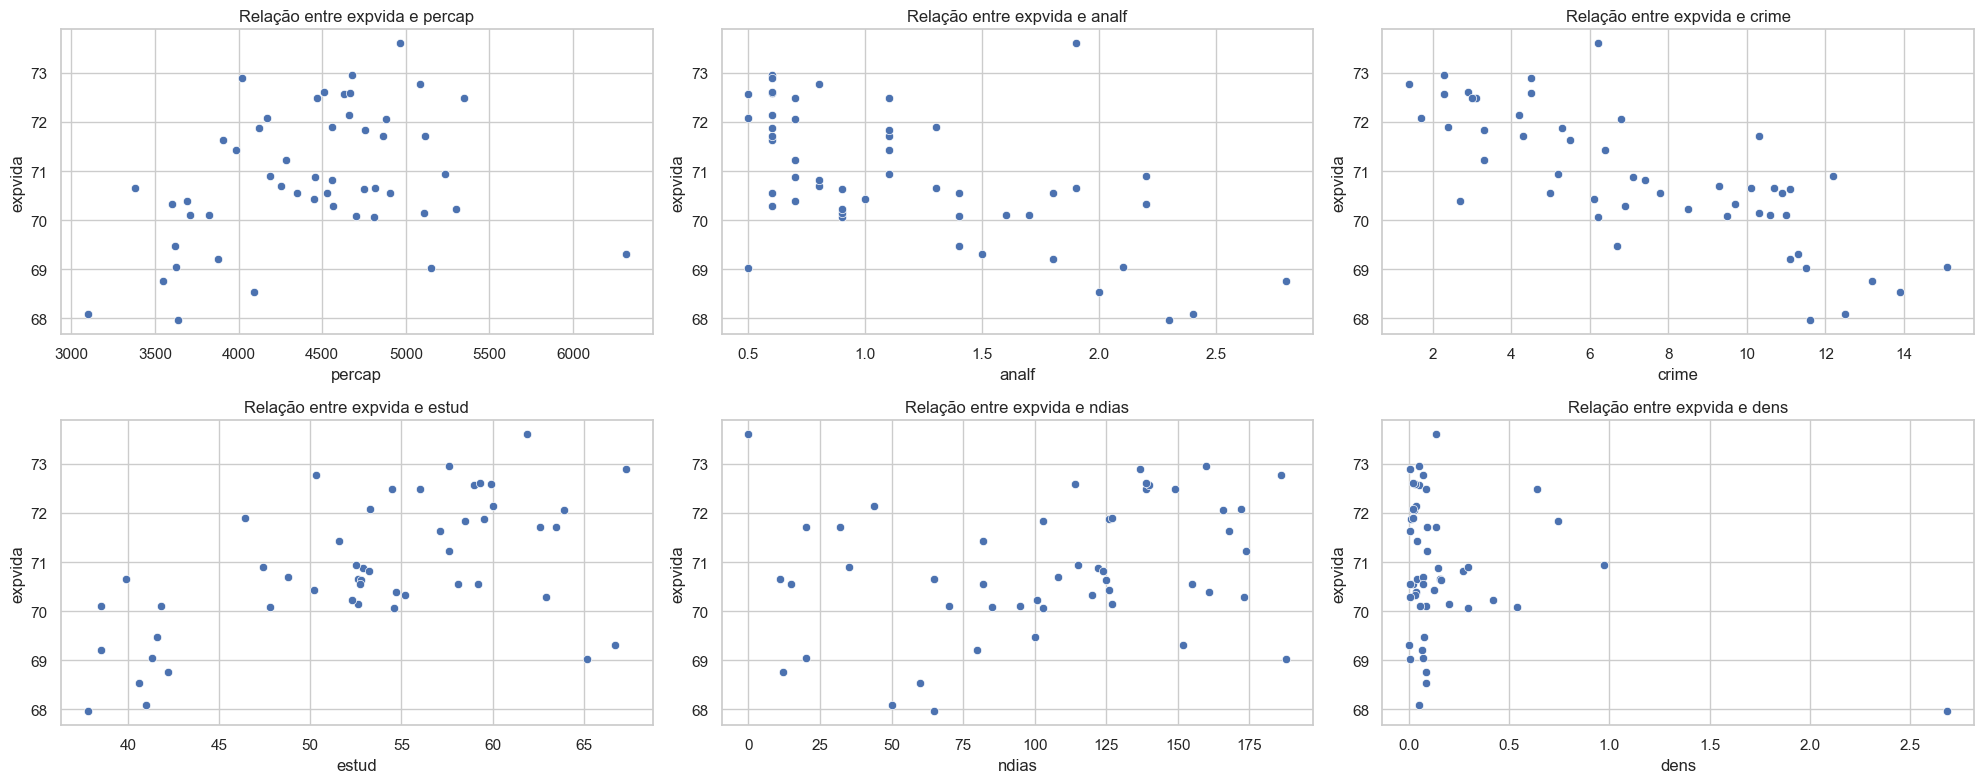

In [104]:
# Visualizar a Relação entre expvida e Variáveis
# Gráfico de dispersão (scatter plots)

# Definir o tamanho da figura
plt.figure(figsize=(20, 8))

# Criar gráficos de dispersão para observar as relações
variables = ['percap', 'analf', 'crime', 'estud', 'ndias', 'dens']
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=expecVida[var], y=expecVida['expvida'])
    plt.title(f'Relação entre expvida e {var}')
    plt.xlabel(var)
    plt.ylabel('expvida')

plt.tight_layout()
plt.show()


### 💡 **Insights**

1. **Renda per capita (percap)**:
   - Parece haver uma correlação positiva, indicando que estados com maior renda per capita tendem a ter uma expectativa de vida mais alta. 📈

2. **Taxa de analfabetismo (analf)**:
   - Existe uma correlação negativa, sugerindo que estados com maior taxa de analfabetismo tendem a ter uma expectativa de vida mais baixa. 📉

3. **Taxa de criminalidade (crime)**:
   - A relação não é muito clara, mas há uma leve tendência de que estados com menor taxa de criminalidade tenham uma expectativa de vida mais alta. 🔍

4. **Taxa de escolaridade (estud)**:
   - Há uma correlação positiva, indicando que estados com maior taxa de escolaridade tendem a ter uma expectativa de vida mais alta. 🎓

5. **Número de dias de sol (ndias)**:
   - A relação não é muito evidente, mas pode haver uma leve tendência de que mais dias de sol estejam associados a uma expectativa de vida ligeiramente maior. ☀️

6. **Densidade populacional (dens)**:
   - A relação não é muito clara, mas parece que estados com densidade populacional muito alta ou muito baixa podem ter uma expectativa de vida variada. 🌍


 **A análise gráfica e descritiva sugere que algumas variáveis, como crime, ndias e dens, parecem ter uma relação mais forte com a expectativa de vida, enquanto outras, como percap e analf, mostram uma relação menos clara.**

### 📊 **Modelo de Regressão Linear com Todas as Variáveis**

#### 📈 **Variáveis Utilizadas:**
- **💰 Renda per capita (percap)**
- **📉 Taxa de Analfabetismo (analf)**
- **🚓 Taxa de Criminalidade (crime)**
- **🎓 Taxa de Escolaridade (estud)**
- **☀️ Número de Dias de Sol (ndias)**
- **🏙️ Densidade Populacional (dens)**

In [105]:
# Importar bibliotecas necessárias para regressão
import statsmodels.api as sm

# Definir as variáveis independentes e adicionar uma constante
X_full = expecVida[['percap', 'analf', 'crime', 'estud', 'ndias', 'dens']]
X_full = sm.add_constant(X_full)

# Definir a variável dependente
y = expecVida['expvida']

# Ajustar o modelo de regressão linear com todas as variáveis explicativas
model_full = sm.OLS(y, X_full).fit()

# Exibir o resumo do modelo completo
model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                expvida   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     20.10
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           4.94e-11
Time:                        19:33:15   Log-Likelihood:                -51.758
No. Observations:                  50   AIC:                             117.5
Df Residuals:                      43   BIC:                             130.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3534      1.376     51.874      0.000      68.579      74.127
percap         0.0002      0.000      0.963      0.341      -0.000       0.001
analf         -0.0528      0.330     -0.160      0.874      -0.718       0.612
crime         -0.2876      0.041     -6.953      0.000      -0.371      -0.204
estud          0.0304      0.021      1.468      0.149      -0.011       0.072
ndias         -0.0075      0.003     -2.706      0.010      -0.013      -0.002
dens          -0.5118      0.276     -1.852      0.071      -1.069       0.046
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.996
Skew:                          -0.259   Prob(JB):                        0.369
Kurtosis:                       2.170   Cond. No.                     6.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 📊 **Insights do Modelo de Regressão Linear**

#### 📈 **Indicadores de Ajuste**
- **R-squared:** 0.737
  - **Interpretação:** 73,7% da variação na expectativa de vida é explicada pelo modelo.
  
- **Adjusted R-squared:** 0.700
  - O R-squared ajustado penaliza o modelo por adicionar variáveis que não contribuem significativamente, ainda indicando um bom ajuste.

- **Prob (F-statistic):** 4.94e-11
  - O valor muito baixo (próximo de 0) indica que o modelo é globalmente significativo, ou seja, ao menos uma das variáveis explicativas tem impacto significativo na expectativa de vida.

#### 📊 **Coeficientes e P-valores**
- **Constante (Intercept):** 71.3534
  - Sugere que, se todas as variáveis explicativas fossem zero, a expectativa de vida seria em torno de 71.35 anos.

- **Percap (Renda per capita):** 
  - **Coeficiente:** 0.0002 
  - **P-valor:** 0.341
    - O coeficiente positivo sugere que, para cada unidade adicional de renda per capita, a expectativa de vida aumenta, embora o p-valor indique que este efeito não é estatisticamente significativo.

- **Analf (Proporção de analfabetismo):** 
  - **Coeficiente:** -0.0528 
  - **P-valor:** 0.874
    - O coeficiente negativo sugere que a expectativa de vida tende a diminuir à medida que a taxa de analfabetismo aumenta, mas o p-valor elevado indica que essa variável não tem um impacto significativo.

- **Crime (Taxa de criminalidade):** 
  - **Coeficiente:** -0.2876 
  - **P-valor:** < 0.0001
    - A criminalidade tem um coeficiente negativo significativo, sugerindo que um aumento na criminalidade está fortemente associado a uma redução na expectativa de vida.

- **Estud (Porcentagem de estudantes que completam o ensino médio):** 
  - **Coeficiente:** 0.0304 
  - **P-valor:** 0.149
    - O coeficiente é positivo, sugerindo que uma maior taxa de educação está associada a um aumento na expectativa de vida, mas o p-valor indica que esse efeito não é estatisticamente significativo.

- **Ndias (Número de dias frios):** 
  - **Coeficiente:** -0.0075 
  - **P-valor:** 0.010
    - Coeficiente negativo e estatisticamente significativo. Mais dias frios estão associados a uma expectativa de vida ligeiramente menor.

- **Dens (Densidade populacional):** 
  - **Coeficiente:** -0.5118 
  - **P-valor:** 0.071
    - Coeficiente negativo que indica que a densidade populacional parece estar associada a uma menor expectativa de vida, com p-valor próximo de 0.05, sugerindo leve significância.

#### 🔍 **Avaliação do Modelo**
- **Multicolinearidade:** 
  - O (Cond. No.) é muito alto (6e+04), sugerindo problemas de multicolinearidade (correlações altas entre as variáveis explicativas). Isso pode inflar os erros padrão e dificultar a interpretação dos coeficientes.


### 📊 **Insights do Modelo de Regressão Linear**

#### 🔍 **Taxa de Criminalidade (crime)**
- **Coeficiente:** -0.2876 
- **P-valor:** < 0.001
  - Um aumento na taxa de criminalidade está associado a uma diminuição na expectativa de vida.
  - O p-valor baixo indica forte evidência contra a hipótese nula, sugerindo que é improvável que o coeficiente seja zero, confirmando que a taxa de criminalidade tem um efeito significativo na expectativa de vida.
- **T-estatística:** -6.953
  - Mede o número de desvios padrão que o coeficiente está longe de 0. 
  - Um valor maior que 2 geralmente indica significância, reforçando que a relação entre a variável independente (crime) e a dependente (expectativa de vida) é negativa e significativa.

#### ☀️ **Número de Dias Frios (ndias)**
- **Coeficiente:** -0.0075 
- **P-valor:** 0.010
  - Sugere que mais dias de sol podem estar associados a uma expectativa de vida ligeiramente menor.

#### 💰 **Renda per Capita (percap)**
- **Significância:** Não estatisticamente significativa (p-valor > 0.05)
  - Embora não significativo, o coeficiente positivo sugere que um aumento na renda per capita pode estar associado a um aumento na expectativa de vida.


#### 📚 **Taxa de Analfabetismo (analf)**
- **Significância:** Não estatisticamente significativa
  - O coeficiente negativo sugere que um aumento na taxa de analfabetismo pode estar associado a uma diminuição na expectativa de vida, mas não é significativo.


#### 🎓 **Taxa de Escolaridade (estud)**
- **Significância:** Não estatisticamente significativa
  - O coeficiente positivo sugere que um aumento na taxa de escolaridade pode estar associado a um aumento na expectativa de vida, mas não é significativo.

#### 🌍 **Densidade Populacional (dens)**
- **Significância:** Não estatisticamente significativa
  - O coeficiente negativo sugere que uma maior densidade populacional pode estar associada a uma menor expectativa de vida, mas não é significativo.

#### 📏 **Constante**
- **Valor:** 71.3534
  - Representa a expectativa de vida média quando todas as variáveis independentes são zero.


### 📋 **Considerações Finais**

#### 🔍 **Multicolinearidade**
- **Definição:** Ocorre quando duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas entre si, dificultando a análise estatística e a interpretação dos coeficientes.
- **Critério:** Um valor acima de 0.70 indica multicolinearidade.
- **Observação:** O número de condição (6.00e+04) é alto, sugerindo possível multicolinearidade.

#### 📊 **Teste de Durbin-Watson**
- **Definição:** Ferramenta estatística usada para detectar a presença de autocorrelação nos erros de previsão de um modelo de regressão.
- **Interpretação dos Valores:**
  - **Próximos de 2:** Indicam que os resíduos são independentes (desejável).
  - **Abaixo de 1:** Indicam forte autocorrelação positiva.
  - **Acima de 3:** Indicam forte autocorrelação negativa.
  
- **Resultado:** O valor de 1.661 está próximo de 2, sugerindo que não há autocorrelação significativa nos resíduos.


**Modelo de Regressão Linear com Todas as Variáveis**

In [106]:
# Ajustar o modelo com as variáveis consideradas significativas, removendo as que têm p-valor acima de 0.05
# Definir as variáveis explicativas significativas
X_signif = expecVida[['crime', 'ndias', 'dens']]

# Adicionar a constante ao modelo
X_signif = sm.add_constant(X_signif)

# Definir a variável dependente
y = expecVida['expvida']

# Ajustar o modelo de regressão linear
modelo_signif = sm.OLS(y, X_signif).fit()

# Exibir o resumo dos resultados
print(modelo_signif.summary())

                            OLS Regression Results                            
Dep. Variable:                expvida   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     32.92
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           1.62e-11
Time:                        19:33:15   Log-Likelihood:                -56.505
No. Observations:                  50   AIC:                             121.0
Df Residuals:                      46   BIC:                             128.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.0443      0.483    153.416      0.0

### 🔍 **Interpretações**

#### 📈 **Variabilidade na Expectativa de Vida**
- **R²:** 68,2% da variabilidade na expectativa de vida pode ser explicada pelas variáveis 'crime', 'ndias' e 'dens'.
- **R² Ajustado:** 0.061 (66,1%), indicando que ainda é uma boa variável na explicação da expectativa de vida.

#### 📊 **Resultados do Modelo**
- **p-valor:** 0.025
- **Constante (Intercept):** 74 anos (quando todas as variáveis explicativas — crime, ndias, densidade — são iguais a 0).

### Coeficientes:
1. **Crime:**
   - **Coeficiente:** 0.3239 (significativo).
   - **Interpretação:** Para cada aumento de 1 na criminalidade, a expectativa de vida diminui aproximadamente 0.32 anos.

2. **Ndias:**
   - **Coeficiente:** -0.06331 (significativo).
   - **Interpretação:** Para cada aumento de 1 dia com temperatura abaixo de 0°C, a expectativa de vida diminui cerca de 0.0063 anos.

3. **Densidade:**
   - **Coeficiente:** -0.6331 (significativo).
   - **Interpretação:** Para cada aumento de 1 na densidade populacional, a expectativa de vida diminui aproximadamente 0.63 anos.

### 📊 **Análise F-statistic**
- **F-statistic:** 32.92
- **Prob(F-statistic):** 1.62e-11
- **Interpretação:** O modelo é globalmente significativo, indicando que as variáveis explicativas têm um impacto conjunto na expectativa de vida.


#### 🔍 **Multicolinearidade**
- **Número de Condição (Cond. No.):** 512, sugere que não há grandes problemas de multicolinearidade entre as variáveis.
- **Testes de Normalidade:** As estatísticas de Omnibus e Jarque-Bera indicam que não há evidências fortes de violação da normalidade dos resíduos.


 Agora todas as variáveis no modelo são estatisticamente significativas e têm um impacto relevante na expectativa de vida. O ajuste do modelo simplificado, embora um pouco menor que o completo em termos de R², ainda explica bem a variabilidade na expectativa de vida e simplifica a interpretação.

¨¨¨¨¨¨¨¨

#### 📉 **Interpretações dos Coeficientes**

1. **Crime:**
   - **Coeficiente:** -0.3239
   - **Interpretação:** Quanto maior a criminalidade, menor a expectativa de vida.

2. **Ndias:**
   - **Coeficiente:** -0.0063
   - **Interpretação:** Quanto mais dias frios, menor a expectativa de vida.

3. **Densidade:**
   - **Coeficiente:** -0.6331
   - **Interpretação:** Quanto maior a densidade populacional, menor a expectativa de vida.


### ✅ **Interpretações Finais**
1. **Modelo RL Completo**:
    - As variáveis crime e ndias foram significativas, sugerindo impacto significativo (estatístico) na expectativa de vida
    - A variável dens não foi conclusiva por não ser tão significativa
    - As variáveis percap, analf e estud não foram significativas.

2. **Modelo RL com variáveis significativas**:
    - Foi ajustado o modelo somente com as v. significativas (incluí também a dens - inconclusiva, mas com tendência) dens, ndias e crime para focar no que realmente impacta a expectativa de vida
    - 'crime' e 'ndias' têm impacto significativo na expectativa de vida